<a href="https://colab.research.google.com/github/aknn/Data-science/blob/master/tegmark_helix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 0/100, Loss: 11709.9854
Epoch 10/100, Loss: 2359.9373
Epoch 20/100, Loss: 203.3448
Epoch 30/100, Loss: 307.1775
Epoch 40/100, Loss: 135.6260
Epoch 50/100, Loss: 56.5956
Epoch 60/100, Loss: 20.8209
Epoch 70/100, Loss: 7.4287
Epoch 80/100, Loss: 2.7226
Epoch 90/100, Loss: 1.4607


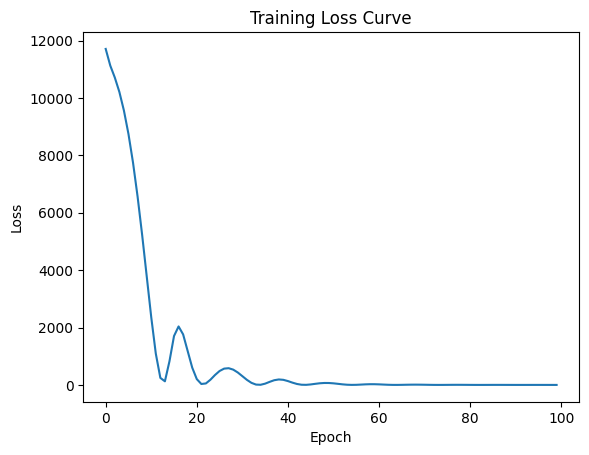

Test Loss: 1.3114


In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Set seed for reproducibility
torch.manual_seed(42)
np.random.seed(42)

# Define Fourier-based Helix Representation
def helix_representation(a, T=[2, 5, 10, 100]):
    return np.array([a] + [np.cos(2 * np.pi * a / t) for t in T] + [np.sin(2 * np.pi * a / t) for t in T])

# Generate dataset
nums = np.arange(0, 100)
helix_data = np.array([helix_representation(a) for a in nums])

# Create addition dataset
X = []
y = []
for a in nums:
    for b in nums:
        X.append(np.hstack([helix_representation(a), helix_representation(b)]))
        y.append(a + b)

X = np.array(X)
y = np.array(y).reshape(-1, 1)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert to PyTorch tensors
X_train_torch = torch.tensor(X_train, dtype=torch.float32)
y_train_torch = torch.tensor(y_train, dtype=torch.float32)
X_test_torch = torch.tensor(X_test, dtype=torch.float32)
y_test_torch = torch.tensor(y_test, dtype=torch.float32)

# Define simple MLP model
class MLPAddition(nn.Module):
    def __init__(self):
        super(MLPAddition, self).__init__()
        self.fc1 = nn.Linear(X.shape[1], 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        return self.fc3(x)

# Initialize model, loss, and optimizer
model = MLPAddition()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Training loop
num_epochs = 100
losses = []
for epoch in range(num_epochs):
    optimizer.zero_grad()
    outputs = model(X_train_torch)
    loss = criterion(outputs, y_train_torch)
    loss.backward()
    optimizer.step()
    losses.append(loss.item())
    if epoch % 10 == 0:
        print(f"Epoch {epoch}/{num_epochs}, Loss: {loss.item():.4f}")

# Plot loss curve
plt.plot(losses)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss Curve")
plt.show()

# Evaluate model
with torch.no_grad():
    predictions = model(X_test_torch).numpy()
    test_loss = criterion(torch.tensor(predictions), y_test_torch).item()
    print(f"Test Loss: {test_loss:.4f}")
